In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

In [2]:
bankdata = pd.read_csv("./bill_authentication.csv") 
bankdata.shape

(1372, 5)

In [3]:
bankdata.head() 

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  

In [7]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[155   0]
 [  3 117]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       155
           1       1.00      0.97      0.99       120

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [10]:
def import_iris():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
    # Read dataset to pandas dataframe
    irisdata = pd.read_csv(url, names=colnames) 
    # process
    X = irisdata.drop('Class', axis=1)  
    y = irisdata['Class']  
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)



In [39]:
def polynomial_kernel():
    from sklearn.svm import SVC 
    from sklearn.datasets import make_moons
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import PolynomialFeatures
    pkclassifier = SVC(kernel='poly', degree = 8)  
    pkclassifier.fit(X_train, y_train)  
    y_pred_pk = pkclassifier.predict(X_test) 
    from sklearn.metrics import classification_report, confusion_matrix 
    print("Using Polynomial Kernal:")
    print(confusion_matrix(y_test,y_pred_pk))  
    print(classification_report(y_test,y_pred_pk))
    
    plt.figure(figsize=(11, 4))
    plt.subplot(121)
    plot_predictions(pk, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    plt.title(r"$d=3, r=1, C=5$", fontsize=18)
    plt.show()
    # Trains, predicts and evaluates the model

In [27]:
def gaussian_kernel():
    from sklearn.svm import SVC  
    gclassifier = SVC(kernel='rbf')  
    gclassifier.fit(X_train, y_train)  
    y_pred_g = gclassifier.predict(X_test) 
    from sklearn.metrics import classification_report, confusion_matrix  
    print("Using Gaussian Kernel:")
    print(confusion_matrix(y_test,y_pred_g))  
    print(classification_report(y_test,y_pred_g))


In [28]:
def sigmoid_kernel():

    from sklearn.svm import SVC  
    sclassifier = SVC(kernel='sigmoid')  
    sclassifier.fit(X_train, y_train)  
    y_pred_s = sclassifier.predict(X_test) 
    from sklearn.metrics import classification_report, confusion_matrix  
    print("Using Sigmoid Kernel:")
    print(confusion_matrix(y_test,y_pred_s))  
    print(classification_report(y_test,y_pred_s))

In [40]:
def test():

    import_iris()

    polynomial_kernel()

    gaussian_kernel()

    sigmoid_kernel()

c:\users\shubham bhadra\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Using Polynomial Kernal:
[[147   8]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       155
           1       0.94      0.99      0.96       120

   micro avg       0.97      0.97      0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



NameError: name 'plot_predictions' is not defined

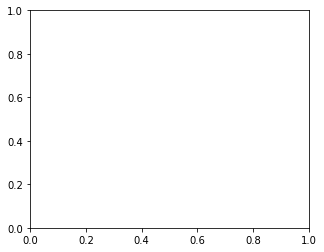

In [36]:
test()